In [93]:
import pandas as pd  
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import f_oneway

In [94]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [95]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      48673 non-null  int64  
 1   Created Date                    48673 non-null  object 
 2   Closed Date                     48409 non-null  object 
 3   Agency                          48673 non-null  object 
 4   Agency Name                     48673 non-null  object 
 5   Complaint Type                  48673 non-null  object 
 6   Descriptor                      47990 non-null  object 
 7   Location Type                   48673 non-null  object 
 8   Incident Zip                    48367 non-null  float64
 9   Incident Address                43011 non-null  object 
 10  Street Name                     43011 non-null  object 
 11  Cross Street 1                  42283 non-null  object 
 12  Cross Street 2                  

In [97]:
df.shape  #shape of database

(48673, 53)

In [98]:
null_counts = df.isnull().sum()   # null values

In [99]:
null_counts

Unique Key                            0
Created Date                          0
Closed Date                         264
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          683
Location Type                         0
Incident Zip                        306
Incident Address                   5662
Street Name                        5662
Cross Street 1                     6390
Cross Street 2                     6438
Intersection Street 1             43071
Intersection Street 2             43125
Address Type                        349
City                                307
Landmark                          48644
Facility Type                       259
Status                                0
Due Date                              0
Resolution Description                1
Resolution Action Updated Date      260
Community Board                       1
Borough                               1


In [100]:
null_vars = null_counts[null_counts > 0]  # plot a graph of null values to visualize


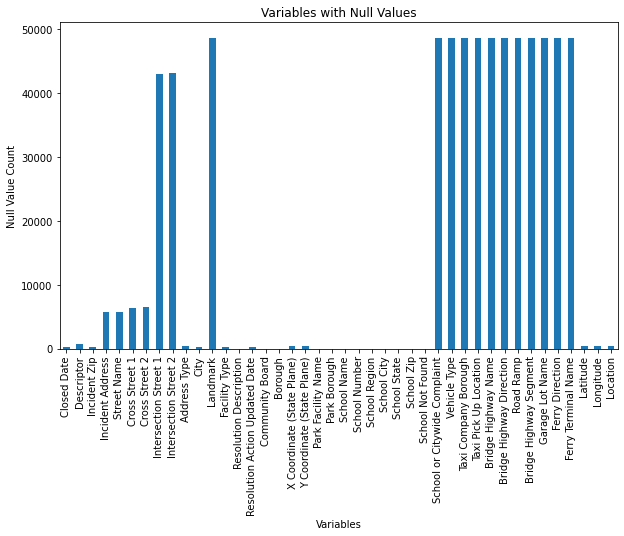

In [101]:
plt.figure(figsize=(10, 6))
null_vars.plot(kind='bar')
plt.title('Variables with Null Values')
plt.xlabel('Variables')
plt.ylabel('Null Value Count')
plt.show()

In [102]:
#dropping unneccessary columns
columns_to_drop = ["Intersection Street 1","Intersection Street 2","Landmark","School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name",
"Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction","Ferry Terminal Name"] 
df_dropped = df.drop(columns=columns_to_drop)

In [103]:
df.shape

(48673, 53)

In [104]:
df_dropped.shape   

(48673, 39)

In [105]:
df=df_dropped

In [106]:
df.shape


(48673, 39)

In [107]:
null_counts = df.isnull().sum()

In [108]:
null_counts

Unique Key                           0
Created Date                         0
Closed Date                        264
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                         683
Location Type                        0
Incident Zip                       306
Incident Address                  5662
Street Name                       5662
Cross Street 1                    6390
Cross Street 2                    6438
Address Type                       349
City                               307
Facility Type                      259
Status                               0
Due Date                             0
Resolution Description               1
Resolution Action Updated Date     260
Community Board                      1
Borough                              1
X Coordinate (State Plane)         409
Y Coordinate (State Plane)         409
Park Facility Name                   1
Park Borough             

In [109]:
unique_values = df['Created Date'].unique()

In [110]:
unique_values

array(['12/31/2015 11:59:45 PM', '12/31/2015 11:59:44 PM',
       '12/31/2015 11:59:29 PM', ..., '11/14/2015 11:00:28 AM',
       '11/14/2015 10:59:17 AM', '11/14/2015 10:59:06 AM'], dtype=object)

In [111]:
unique_values1 = df['Closed Date'].unique()

In [112]:
unique_values1

array(['01/01/2016 12:55:15 AM', '01/01/2016 01:26:57 AM',
       '01/01/2016 04:51:03 AM', ..., '11/14/2015 11:42:22 AM',
       '11/14/2015 12:51:31 PM', '11/14/2015 12:14:52 PM'], dtype=object)

In [113]:
# pd.date format
df_dropped['Created Date'] = pd.to_datetime(df_dropped['Created Date'])

In [114]:
start_date = pd.to_datetime('2010-01-01')  # Define your desired start date
df_dropped = df_dropped[df_dropped['Created Date'] >= start_date]

In [115]:
df_dropped.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


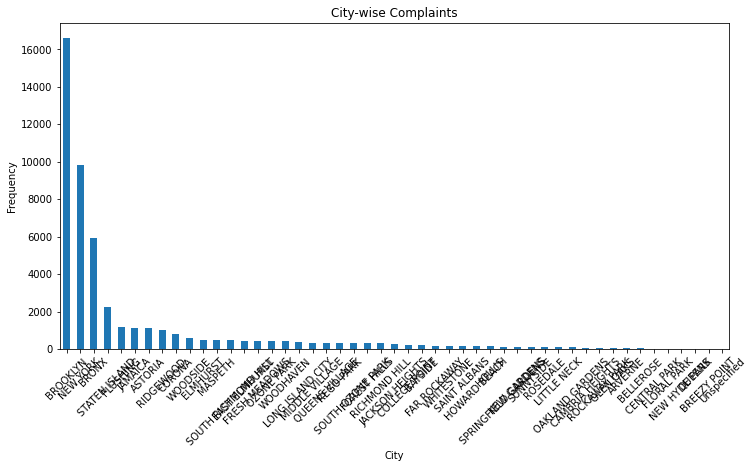

In [116]:
#Frequency Plot for City-wise Complaints
plt.figure(figsize=(12, 6))
df['City'].value_counts().plot(kind='bar')
plt.title('City-wise Complaints')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

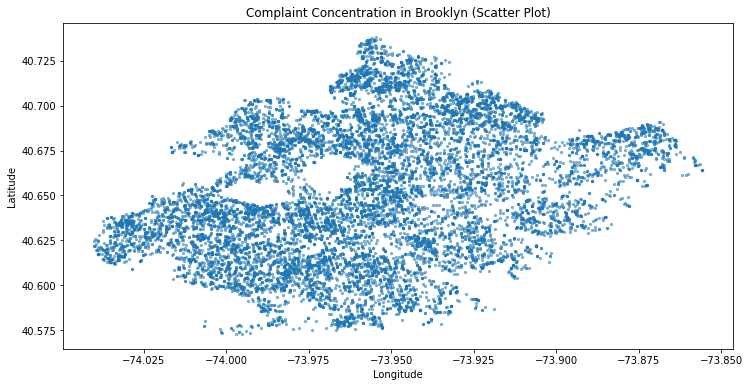

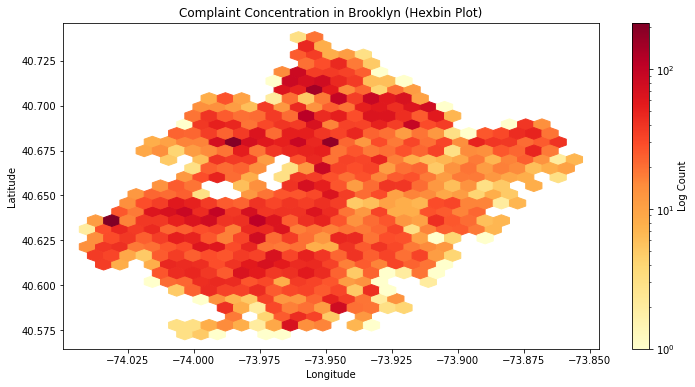

In [117]:
#Draw scatter and hexbin plots for complaint concentration across Brooklyn
brooklyn_df = df_dropped[df_dropped['Borough'] == 'BROOKLYN']

plt.figure(figsize=(12, 6))
plt.scatter(brooklyn_df['Longitude'], brooklyn_df['Latitude'], s=5, alpha=0.5)
plt.title('Complaint Concentration in Brooklyn (Scatter Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(12, 6))
plt.hexbin(brooklyn_df['Longitude'], brooklyn_df['Latitude'], gridsize=30, cmap='YlOrRd', bins='log')
plt.title('Complaint Concentration in Brooklyn (Hexbin Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Log Count')
plt.show()

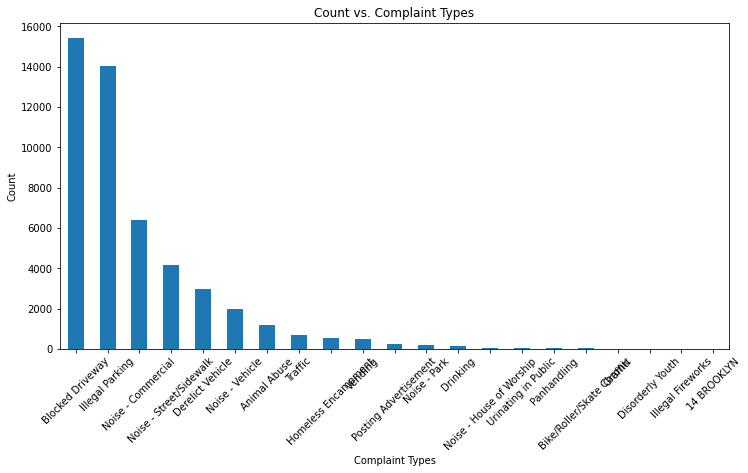

In [118]:
# bar graph of count vs. complaint types
complaint_counts = df_dropped['Complaint Type'].value_counts()

plt.figure(figsize=(12, 6))
complaint_counts.plot(kind='bar')
plt.title('Count vs. Complaint Types')
plt.xlabel('Complaint Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [119]:
# Top 10 complaints types
top_10_complaints = df_dropped['Complaint Type'].value_counts().head(10)
print(top_10_complaints)

Blocked Driveway           15396
Illegal Parking            14012
Noise - Commercial          6374
Noise - Street/Sidewalk     4172
Derelict Vehicle            2963
Noise - Vehicle             1984
Animal Abuse                1210
Traffic                      673
Homeless Encampment          545
Vending                      498
Name: Complaint Type, dtype: int64


In [120]:
# Create a separate dataset with types of complaints in each city
complaints_by_city = df_dropped.groupby('City')['Complaint Type'].unique()

In [121]:
complaints_by_city

City
ARVERNE                [Illegal Parking, Noise - Commercial, Animal A...
ASTORIA                [Blocked Driveway, Noise - Commercial, Noise -...
BAYSIDE                [Blocked Driveway, Derelict Vehicle, Illegal P...
BELLEROSE              [Derelict Vehicle, Blocked Driveway, Noise - S...
BREEZY POINT                 [Noise - Street/Sidewalk, Blocked Driveway]
BRONX                  [Blocked Driveway, Illegal Parking, Noise - St...
BROOKLYN               [Illegal Parking, Blocked Driveway, Noise - Co...
CAMBRIA HEIGHTS        [Derelict Vehicle, Blocked Driveway, Noise - C...
CENTRAL PARK                                   [Noise - Street/Sidewalk]
COLLEGE POINT          [Illegal Parking, Blocked Driveway, Derelict V...
CORONA                 [Blocked Driveway, Illegal Parking, Urinating ...
EAST ELMHURST          [Noise - House of Worship, Blocked Driveway, I...
ELMHURST               [Illegal Parking, Blocked Driveway, Noise - Ve...
FAR ROCKAWAY           [Blocked Driveway, Ille

In [122]:
complaints_by_city_df_dropped = pd.DataFrame(complaints_by_city)


In [123]:
complaints_by_city_df_dropped

,Complaint Type
City,
ARVERNE,"[Illegal Parking, Noise - Commercial, Animal A..."
ASTORIA,"[Blocked Driveway, Noise - Commercial, Noise -..."
BAYSIDE,"[Blocked Driveway, Derelict Vehicle, Illegal P..."
BELLEROSE,"[Derelict Vehicle, Blocked Driveway, Noise - S..."
BREEZY POINT,"[Noise - Street/Sidewalk, Blocked Driveway]"
BRONX,"[Blocked Driveway, Illegal Parking, Noise - St..."
BROOKLYN,"[Illegal Parking, Blocked Driveway, Noise - Co..."
CAMBRIA HEIGHTS,"[Derelict Vehicle, Blocked Driveway, Noise - C..."
CENTRAL PARK,[Noise - Street/Sidewalk]


In [124]:
complaints_by_city_df_dropped = complaints_by_city_df_dropped.reset_index()


In [125]:
complaints_by_city_df_dropped.columns = ['City', 'Complaint Types']

In [126]:
complaints_by_city_df_dropped

,City,Complaint Types
0,ARVERNE,"[Illegal Parking, Noise - Commercial, Animal A..."
1,ASTORIA,"[Blocked Driveway, Noise - Commercial, Noise -..."
2,BAYSIDE,"[Blocked Driveway, Derelict Vehicle, Illegal P..."
3,BELLEROSE,"[Derelict Vehicle, Blocked Driveway, Noise - S..."
4,BREEZY POINT,"[Noise - Street/Sidewalk, Blocked Driveway]"
5,BRONX,"[Blocked Driveway, Illegal Parking, Noise - St..."
6,BROOKLYN,"[Illegal Parking, Blocked Driveway, Noise - Co..."
7,CAMBRIA HEIGHTS,"[Derelict Vehicle, Blocked Driveway, Noise - C..."
8,CENTRAL PARK,[Noise - Street/Sidewalk]
9,COLLEGE POINT,"[Illegal Parking, Blocked Driveway, Derelict V..."


In [127]:
#Visualize the major types of complaints in each city
complaints_by_city_type = df_dropped.groupby(['City', 'Complaint Type']).size().unstack()

<Figure size 1584x864 with 0 Axes>

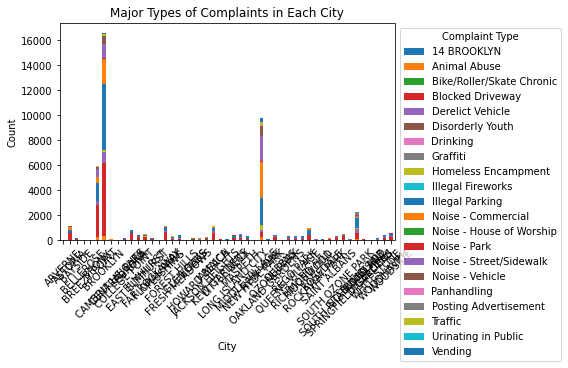

In [128]:
# Plot stacked bar chart for each city
plt.figure(figsize=(22, 12))
complaints_by_city_type.plot(kind='bar', stacked=True)
plt.title('Major Types of Complaints in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Complaint Type', bbox_to_anchor=(1, 1))
plt.show()

In [129]:
#Check if the average response time across various types of complaints
# Convert the date columns to datetime format
df_dropped['Created Date'] = pd.to_datetime(df_dropped['Created Date'])
df_dropped['Closed Date'] = pd.to_datetime(df_dropped['Closed Date'])

In [131]:
# Calculate the response time for each row
df_dropped['Response_Time'] = df_dropped['Closed Date'] - df_dropped['Created Date']

In [132]:
# Print the response time for each row
print(df_dropped['Response_Time'])

0       0 days 00:55:30
1       0 days 01:27:13
2       0 days 04:51:34
3       0 days 07:45:27
4       0 days 03:27:44
              ...      
48668   0 days 03:06:02
48669   0 days 02:54:49
48670   0 days 00:41:54
48671   0 days 01:52:14
48672   0 days 01:15:46
Name: Response_Time, Length: 48673, dtype: timedelta64[ns]


In [133]:
# Calculate average response time
average_response_time = df_dropped['Response_Time'].mean()
print("Average Response Time:", average_response_time)

Average Response Time: 0 days 04:43:41.167716746
